## Downloading the Dataset

In this section, we will download the dataset from kaggle using the opendatasets library.

In [1]:
!pip install opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/sheenabatra/facebook-data' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rupeshsharma14
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 1.82M/1.82M [00:00<00:00, 31.2MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './facebook-data'

In [5]:
import os
os.listdir(data_dir)

['pseudo_facebook.csv']

## Data Preparation and Cleaning

In this section, we will perform the following tasks:
- Load our dataset into panadas.
- Rename few columns.
- Check the size of the dataset.
- Basic descriptive statistics about the dataset.
- Clean our dataset for any missing values.
- Format our data types.
- Create a new column which will help us to categorize column 'age'.

In [6]:
import pandas as pd
import numpy as np

Loading the dataset into a dataframe using pandas.

In [7]:
df = pd.read_csv(data_dir + '/pseudo_facebook.csv')

In [8]:
df.head(10)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0
7,1680361,13,4,2000,1,female,0.0,0,0,0,0,0,0,0,0
8,1365174,13,1,2000,1,male,81.0,0,0,0,0,0,0,0,0
9,1712567,13,2,2000,2,male,171.0,0,0,0,0,0,0,0,0


To get better understanding of the dataset, lets rename its two columns.

In [9]:
df.rename(columns = {'likes' : 'total_likes', 'likes_received' : 'total_likes_recieved'}, inplace = True)

In [10]:
df.head(10)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,total_likes,total_likes_recieved,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0
7,1680361,13,4,2000,1,female,0.0,0,0,0,0,0,0,0,0
8,1365174,13,1,2000,1,male,81.0,0,0,0,0,0,0,0,0
9,1712567,13,2,2000,2,male,171.0,0,0,0,0,0,0,0,0


Exploring the number of rows and columns of the dataset.

In [11]:
df.shape

(99003, 15)

Basic descriptive statistics about the dataset.

In [12]:
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,total_likes,total_likes_recieved,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


Checking for any missing values in the dataset.

In [13]:
df.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
total_likes                0
total_likes_recieved       0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

We can see that the column 'gender' contains 175 NaN values and column 'tenure' contains 2 NaN values.

Now, we will clean our dataset and get rid of the NaN values.

In [14]:
df.dropna(how = 'any', axis = 0, inplace = True)

Now, again checking for any missing values in the dataset.

In [15]:
df.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
total_likes              0
total_likes_recieved     0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

Now our data is cleaned.

Now we will check the data type of each column.

In [16]:
df.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
total_likes                int64
total_likes_recieved       int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

As we can see that column 'tenure' is a float value which should be an integer value.Therefore, we will covert its data type to int.

In [17]:
df['tenure'] = df['tenure'].astype('int')

Now, again checking for the data type of each column.

In [18]:
df.dtypes

userid                    int64
age                       int64
dob_day                   int64
dob_year                  int64
dob_month                 int64
gender                   object
tenure                    int32
friend_count              int64
friendships_initiated     int64
total_likes               int64
total_likes_recieved      int64
mobile_likes              int64
mobile_likes_received     int64
www_likes                 int64
www_likes_received        int64
dtype: object

Now, our data types are formatted correctly.

Lets create a new column named 'age_group' to group ages into praticular groups.

In [19]:
labels=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
df['age_group'] = pd.cut(df['age'],bins=np.arange(10,121,10),labels=labels,right=True)
df.head(10)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,total_likes,total_likes_recieved,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,10-20
5,1524765,14,1,1999,12,male,15,0,0,0,0,0,0,0,0,10-20
6,1136133,13,14,2000,1,male,12,0,0,0,0,0,0,0,0,10-20
7,1680361,13,4,2000,1,female,0,0,0,0,0,0,0,0,0,10-20
8,1365174,13,1,2000,1,male,81,0,0,0,0,0,0,0,0,10-20
9,1712567,13,2,2000,2,male,171,0,0,0,0,0,0,0,0,10-20


Now, are dataset is ready for analysis.

## Exploratory Analysis and Visualization

In this section, we will analyse some important insights about the data and visualize it with the help of python libraries.
In this section we have analysed:
- Representation of users on basis of gender.
- Distribution of users age.
- Comparison of number of friends and age on gender basis.
- Out of male or female, which category have most non-active accounts.
- Top 10 most liked users of facebook.

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Representation of facebook users on basis of gender**

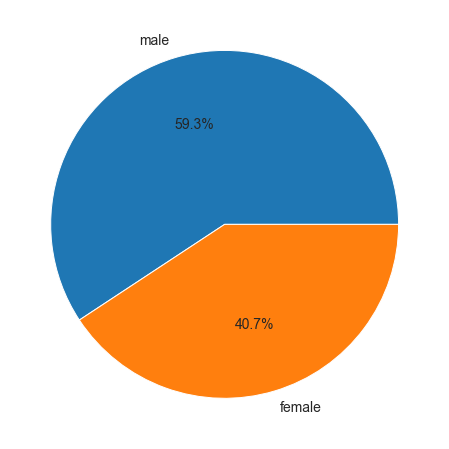

In [21]:
plt.pie(df['gender'].value_counts(), labels = ['male', 'female'], autopct='%1.1f%%');

From the above pie chart, we can conclude that on facebook male users are more as compared to female users.

**Distribution of users age on Facebook** 

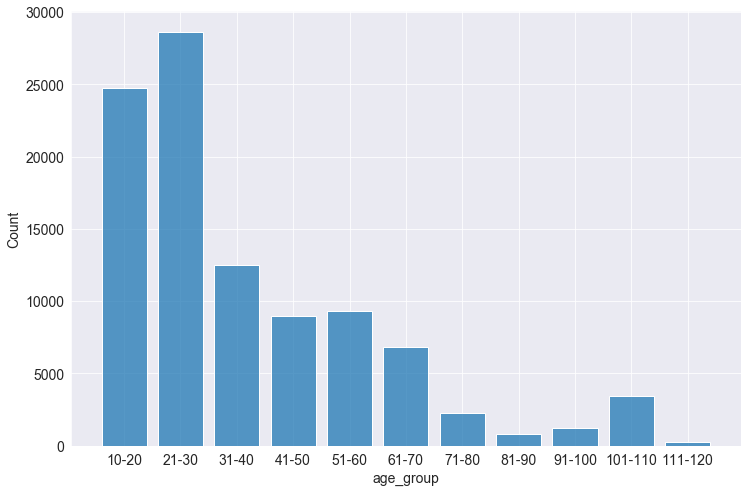

In [22]:
sns.histplot(df['age_group'], shrink = 0.80);

As from the above graph, we can conclude that facebook is mostly used by the young generations(10-40) as compared to the middled aged and older aged groups.

**Comparison of number of facebook friends on basis of gender** 

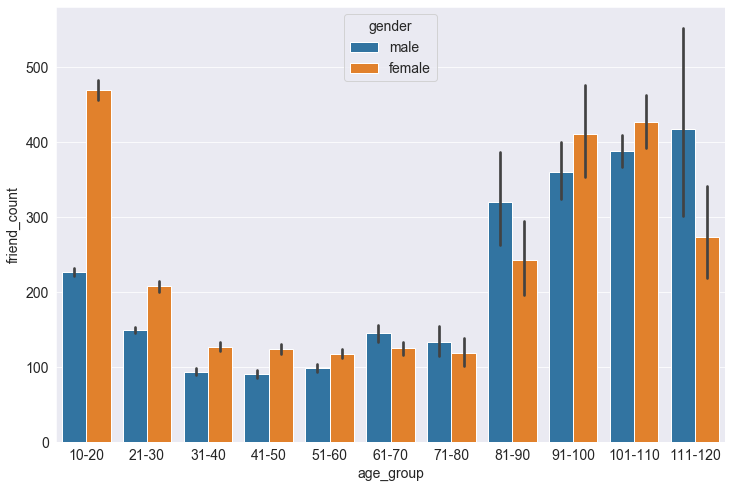

In [23]:
sns.barplot(x = df['age_group'], y = df['friend_count'], hue = df['gender']);

From the above, we can say that females have more friends as compared to males.

**Out of male or female, which category have most non-active accounts**

In [24]:
dummy = df[(df['total_likes'] == 0) & (df['total_likes_recieved'] == 0) & (df['friend_count'] == 0) & (df['friendships_initiated'] == 0)]

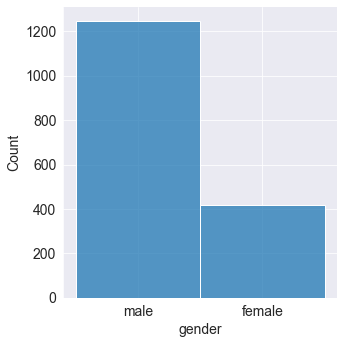

In [25]:
sns.displot(dummy['gender']);

From the above graph, we can conclude that the male category have most non-active accounts.

**Top 10 most liked users**

In [26]:
dummy2 = df[['userid','gender','total_likes_recieved']].sort_values(by = 'total_likes_recieved', ascending=False).head(10)

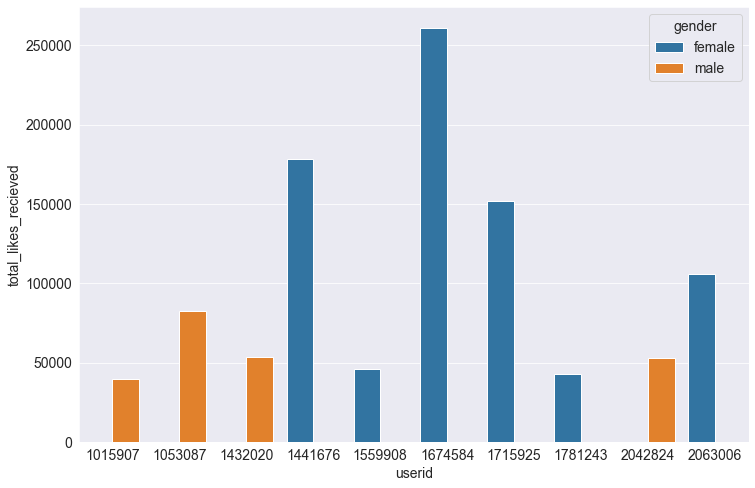

In [27]:
sns.barplot(x = dummy2['userid'], y = dummy2['total_likes_recieved'], hue = dummy2['gender']);

From the above graph, we can conclude that out of 10 most liked personality 6 are females.

## Asking and Answering Questions

We have already gained several insights about the users. Now, lets ask some specific questions, and try to answer them using data frame operations.

#### Q1: Number of friendship initiated by male and female

In [28]:
d = df.groupby('gender')
friendship_initiated = d[['friendships_initiated']].sum().reset_index()
friendship_initiated

,gender,friendships_initiated
0,female,4584801
1,male,6037023


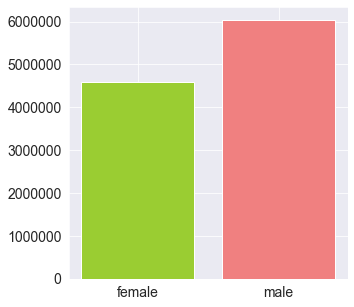

In [29]:
plt.figure(figsize = (5,5))
color = ['yellowgreen', 'lightcoral']
plt.bar(friendship_initiated['gender'], friendship_initiated['friendships_initiated'], color = color);

Males are good at initiating new friendships.

#### Q2: In which month maximum number of birthdays are celebrated on facebook

In [30]:
df['dob_month'].value_counts().idxmax()

1

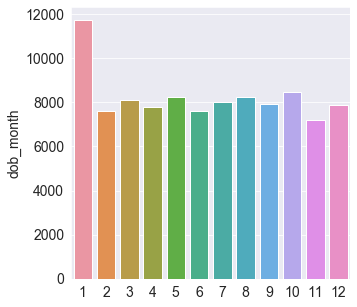

In [31]:
plt.figure(figsize = (5,5))
sns.barplot(x = df['dob_month'].value_counts().index, y = df['dob_month'].value_counts());

Maximum number of birthdays are celebrated in the month of January.

#### Q3: Which top 10 users have the maximum number of friends on facebook

In [32]:
user_max_friend = df.groupby('userid')['friend_count'].max().reset_index().sort_values(by = 'friend_count', ascending= False).head(10)
user_max_friend

,userid,friend_count
90314,2090699,4923
54689,1660276,4917
76738,1926655,4863
56761,1685573,4845
31993,1386477,4844
50069,1604095,4826
86430,2042824,4817
43805,1529639,4803
48743,1587911,4797
16898,1205425,4794


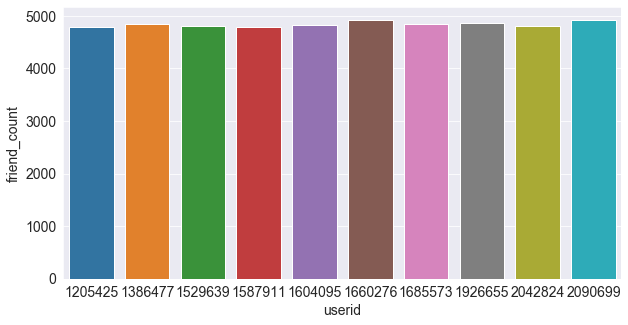

In [33]:
plt.figure(figsize = (10,5))
sns.barplot(x = user_max_friend['userid'], y = user_max_friend['friend_count']);

The above results displays the top 10 users that have maximum number of friends.

#### Q4: Which top 10 facebook users have the longest tenure

In [34]:
user_max_tenure = df.groupby('userid')['tenure'].max().reset_index().sort_values(by = 'tenure', ascending = False).head(10)
user_max_tenure

,userid,tenure
49872,1601778,3139
94021,2135122,3139
34718,1419799,3139
94199,2137369,3129
92032,2111567,3128
77427,1934957,3101
85608,2032933,3019
97023,2171167,2958
58116,1701874,2926
47584,1574331,2888


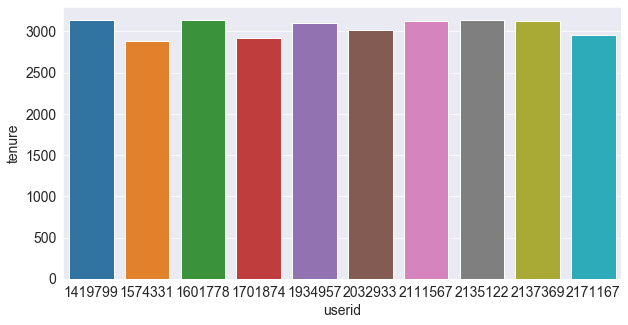

In [35]:
plt.figure(figsize = (10,5))
sns.barplot(x = user_max_tenure['userid'], y = user_max_tenure['tenure']);

The above results displays top 10 users that have maximum number of tenure.

#### Q5: Number of users that haven't performed any activity on facebook.

In [36]:
df[(df['total_likes'] == 0) & (df['total_likes_recieved'] == 0) & (df['friend_count'] == 0) & (df['friendships_initiated'] == 0)].shape[0]

1664

The above query displays total number of users that haven't performed any activity on facebook.

## Inferences and Conclusion

We have drawn many interesting interferences from the dataset, here's a summary of few of them:
- On facebook, male users are more as compared to the female users.
- Facebook is mostly used by younger persons as compared to other age group. So, it would be more efficient and easy for the marketing company to target younger generation using facebook as its advertising platform.
- Mostly females especially young, have a good network(friend circle) on facebook which means that if advertising company targets these young females for there products, there is a high probability there products will become popular in a short span of time.
- From the dataset, we can also say that many males are non-active as compared to the females. Therefore, any company will not try to target the non-active users.
- The advertising companies can also hire most liked facebook users for there products as they are very much popular on this platform.
- Males are good at initiating new friendships.
- Maximum number of birthdays are celebrated in month of January. This information can be useful for Event Management companies to increase there marketing before January to get maximum benifit.